# Base NBA 2021 Multiple Regression and Random Forest

In [119]:
library(tidyverse)

In [120]:
base_nba<-read_csv("../input/nba2k20-player-dataset/nba2k20-full.csv")
base_nba<-base_nba[,c(1:8,10:14,9)]
length(base_nba)
head(base_nba)


── Column specification ────────────────────────────────────────────────────────
cols(
  full_name = col_character(),
  rating = col_double(),
  jersey = col_character(),
  team = col_character(),
  position = col_character(),
  b_day = col_character(),
  height = col_character(),
  weight = col_character(),
  salary = col_character(),
  country = col_character(),
  draft_year = col_double(),
  draft_round = col_character(),
  draft_peak = col_character(),
  college = col_character()
)




[1] 14

full_name,rating,jersey,team,position,b_day,height,weight,country,draft_year,draft_round,draft_peak,college,salary
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,USA,2003,1,1,NA,$37436858
Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,USA,2011,1,15,San Diego State,$32742000
Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,Greece,2013,1,15,NA,$25842697
Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,USA,2007,1,2,Texas,$37199000
James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,USA,2009,1,3,Arizona State,$38199000
Stephen Curry,95,#30,Golden State Warriors,G,03/14/88,6-3 / 1.91,185 lbs. / 83.9 kg.,USA,2009,1,7,Davidson,$40231758


## Removendo "$# e transformando em numero.

In [121]:
library(stringr)
base_nba$salary<-str_remove_all(string = base_nba$salary,pattern ="^[$]" )
base_nba$salary<-as.numeric(base_nba$salary)
head(base_nba,3)

full_name,rating,jersey,team,position,b_day,height,weight,country,draft_year,draft_round,draft_peak,college,salary
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,USA,2003,1,1,NA,37436858
Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,USA,2011,1,15,San Diego State,32742000
Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,Greece,2013,1,15,NA,25842697


## Transformando caracteres em datas

In [122]:
library(lubridate)
base_nba$b_day<-mdy(base_nba$b_day)
base_nba<-base_nba %>% mutate(age=round((today() - base_nba$b_day)/dyears(x = 1),digits = 0)) 
base_nba<-base_nba[,c(1:6,15,7:14)]

In [123]:
head(base_nba)

full_name,rating,jersey,team,position,b_day,age,height,weight,country,draft_year,draft_round,draft_peak,college,salary
<chr>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,36,6-9 / 2.06,250 lbs. / 113.4 kg.,USA,2003,1,1,NA,37436858
Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,30,6-7 / 2.01,225 lbs. / 102.1 kg.,USA,2011,1,15,San Diego State,32742000
Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,27,6-11 / 2.11,242 lbs. / 109.8 kg.,Greece,2013,1,15,NA,25842697
Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,33,6-10 / 2.08,230 lbs. / 104.3 kg.,USA,2007,1,2,Texas,37199000
James Harden,96,#13,Houston Rockets,G,1989-08-26,32,6-5 / 1.96,220 lbs. / 99.8 kg.,USA,2009,1,3,Arizona State,38199000
Stephen Curry,95,#30,Golden State Warriors,G,1988-03-14,33,6-3 / 1.91,185 lbs. / 83.9 kg.,USA,2009,1,7,Davidson,40231758


In [124]:
base_nba %>% select(full_name,salary) %>% arrange(desc(salary)) %>% head(10)

full_name,salary
<chr>,<dbl>
Stephen Curry,40231758
Russell Westbrook,38506482
Chris Paul,38506482
James Harden,38199000
John Wall,38199000
LeBron James,37436858
Kevin Durant,37199000
Blake Griffin,34449964
Kyle Lowry,33296296


In [125]:
base_nba$indice<- c(1:nrow(base_nba))
base_nba<-base_nba[,c(16,1:15)]

In [126]:
nomes<-names(base_nba)
nomes[c(9,10)]<-c("height_meters","weight_KG")
names(base_nba)<-nomes

In [127]:
library(stringr)
head(base_nba)

indice,full_name,rating,jersey,team,position,b_day,age,height_meters,weight_KG,country,draft_year,draft_round,draft_peak,college,salary
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,36,6-9 / 2.06,250 lbs. / 113.4 kg.,USA,2003,1,1,NA,37436858
2,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,30,6-7 / 2.01,225 lbs. / 102.1 kg.,USA,2011,1,15,San Diego State,32742000
3,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,27,6-11 / 2.11,242 lbs. / 109.8 kg.,Greece,2013,1,15,NA,25842697
4,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,33,6-10 / 2.08,230 lbs. / 104.3 kg.,USA,2007,1,2,Texas,37199000
5,James Harden,96,#13,Houston Rockets,G,1989-08-26,32,6-5 / 1.96,220 lbs. / 99.8 kg.,USA,2009,1,3,Arizona State,38199000
6,Stephen Curry,95,#30,Golden State Warriors,G,1988-03-14,33,6-3 / 1.91,185 lbs. / 83.9 kg.,USA,2009,1,7,Davidson,40231758


## Substituir excesso de informaçoes na variavel height_meters

In [128]:
base_nba$height_meters<-str_sub(base_nba$height_meters,start = 6,end = 10)
base_nba$height_meters<-str_remove_all(base_nba$height_meters,pattern = "[/]")
base_nba$height_meters<-as.numeric(base_nba$height_meters)

## Substituir excesso de informaçoes na variavel weight_KG

In [129]:
base_nba$weight_KG<-str_sub(base_nba$weight_KG,start = 10,end = 20)
base_nba$weight_KG<-str_remove_all(base_nba$weight_KG,pattern = "[/]")
base_nba$weight_KG<-str_remove_all(base_nba$weight_KG,pattern = "[kg]")
base_nba$weight_KG<-str_sub(base_nba$weight_KG,start = 1,end = 6)

In [130]:
base_nba$weight_KG<- as.numeric(base_nba$weight_KG)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [131]:
head(base_nba,3)
indice_peso<-base_nba %>% filter(is.na(weight_KG))

indice,full_name,rating,jersey,team,position,b_day,age,height_meters,weight_KG,country,draft_year,draft_round,draft_peak,college,salary
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,36,2.06,113.4,USA,2003,1,1,NA,37436858
2,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,30,2.01,102.1,USA,2011,1,15,San Diego State,32742000
3,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,27,2.10,109.8,Greece,2013,1,15,NA,25842697


In [132]:
base_nba %>% transmute(medias_pesos=mean(weight_KG, na.rm = TRUE)) %>% distinct(medias_pesos,.keep_all = TRUE)

medias_pesos
<dbl>
97.25527


## Preencher NAs com a média dos pesos.

In [133]:
base_nba$weight_KG[indice_peso$indice]<-97.26
head(base_nba,4)

indice,full_name,rating,jersey,team,position,b_day,age,height_meters,weight_KG,country,draft_year,draft_round,draft_peak,college,salary
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,36,2.06,113.4,USA,2003,1,1,NA,37436858
2,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,30,2.01,102.1,USA,2011,1,15,San Diego State,32742000
3,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,27,2.10,109.8,Greece,2013,1,15,NA,25842697
4,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,33,2.00,104.3,USA,2007,1,2,Texas,37199000


## Verificar correlação entre: rating,age,height_meters,weight_KG,draft_round,draft_peak,salaray

In [134]:
base_nba$draft_round<-as.numeric(base_nba$draft_round)
base_nba$draft_peak<-as.numeric(base_nba$draft_peak)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [135]:
indice<-base_nba %>% filter(is.na(draft_round))
indice_peak<-base_nba %>% filter(is.na(draft_peak))
base_nba$draft_round[indice$indice]<-0
base_nba$draft_peak[indice_peak$indice]<-0

In [136]:
base_cor<-base_nba[,c(3,8,9,10,13,14,16)]
correlacao<-cor(base_cor) ## só é possivel usar a função cor()  se os dados estiverem no formato tabela(matriz)
correlacao

,rating,age,height_meters,weight_KG,draft_round,draft_peak,salary
rating,1.00000000,0.26891494,0.08606256,0.11850766,0.01962361,-0.23298864,0.77523860
age,0.26891494,1.00000000,-0.01600893,0.04573597,-0.07856408,-0.05850315,0.42703167
height_meters,0.08606256,-0.01600893,1.00000000,0.67033468,0.02384037,-0.04711589,0.05288042
weight_KG,0.11850766,0.04573597,0.67033468,1.00000000,0.05827961,-0.02268488,0.06853739
draft_round,0.01962361,-0.07856408,0.02384037,0.05827961,1.00000000,0.84990362,0.01417303
draft_peak,-0.23298864,-0.05850315,-0.04711589,-0.02268488,0.84990362,1.00000000,-0.17701686
salary,0.77523860,0.42703167,0.05288042,0.06853739,0.01417303,-0.17701686,1.00000000


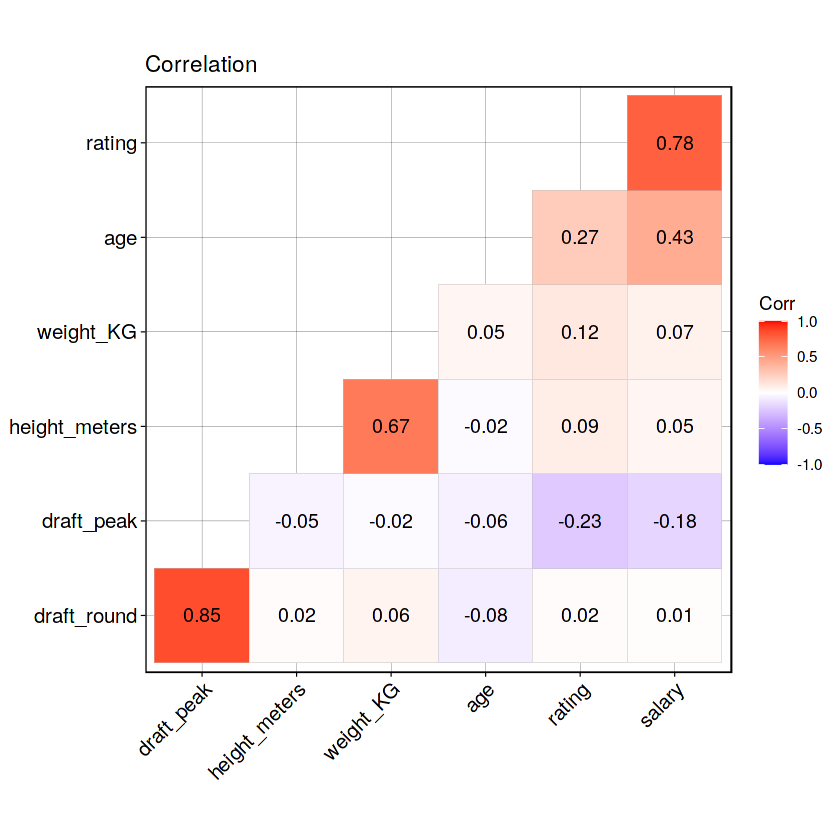

In [137]:
library(ggcorrplot)
ggcorrplot(corr = correlacao,hc.order = TRUE,type = "lower",ggtheme = ggplot2::theme_linedraw, lab = TRUE)+
    ggtitle(label = "Correlation")

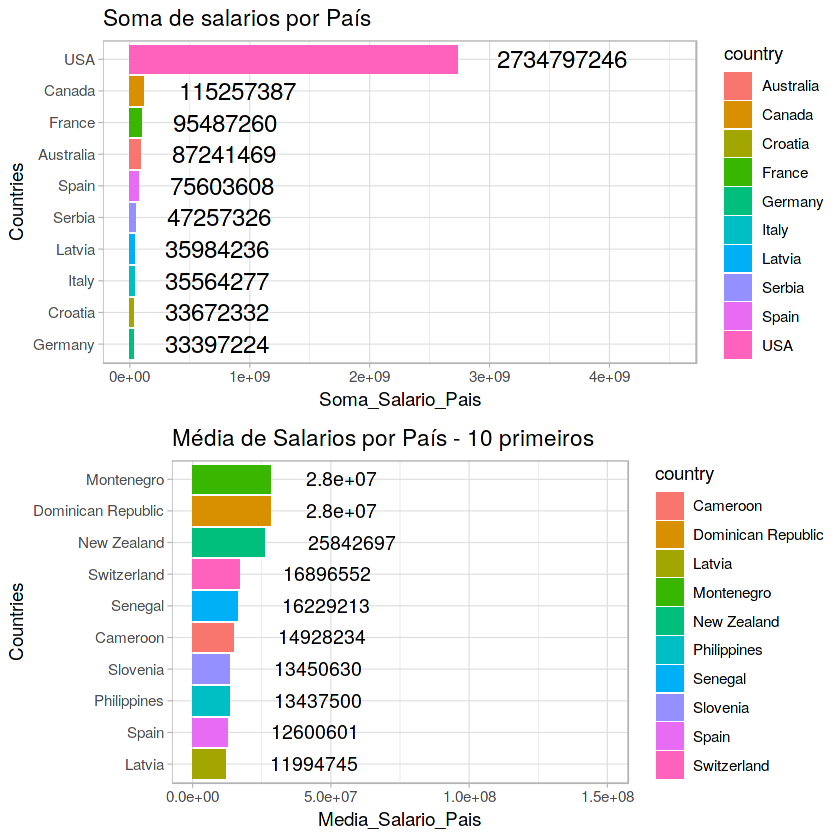

In [138]:
## Soma dos Salarios por País
soma<-base_nba %>% group_by(country) %>% summarize(Soma_Salario_Pais=  sum(salary, na.rm = TRUE), Qtd=n()) %>% arrange(desc(Soma_Salario_Pais)) %>% head(10) %>%
    ggplot()+
        geom_col(mapping = aes(x = reorder(country,Soma_Salario_Pais), y=Soma_Salario_Pais, fill = country)) +
            geom_text(aes(x =reorder(country,Soma_Salario_Pais),y =Soma_Salario_Pais,label=Soma_Salario_Pais  ),size=5, hjust = -0.3)+
                    coord_flip()+
                        scale_y_continuous(limits = c(0.0,4500000000.00))+
                            ggtitle(label = 'Soma de salarios por País')+
                                xlab(label = "Countries")+
                                    theme_light()
###############################
## Media dos Slarios por País
media<-base_nba %>% group_by(country) %>% summarize(Media_Salario_Pais= round(mean(salary,na.rm = TRUE),0), n()) %>% arrange(desc(Media_Salario_Pais)) %>% head(10) %>%
  ggplot()+
        geom_col(mapping = aes(x = reorder(country,Media_Salario_Pais), y=Media_Salario_Pais, fill = country)) +
            geom_text(aes(x =reorder(country,Media_Salario_Pais),y =Media_Salario_Pais,label=Media_Salario_Pais  ),size =4,hjust=-0.5)+
                    coord_flip()+
                         scale_y_continuous(limits = c(0,150000000))+
                            ggtitle(label = 'Média de Salarios por País - 10 primeiros')+
                                xlab(label = "Countries")+
                                    theme_light()

library(gridExtra)
grid.arrange(soma,media)

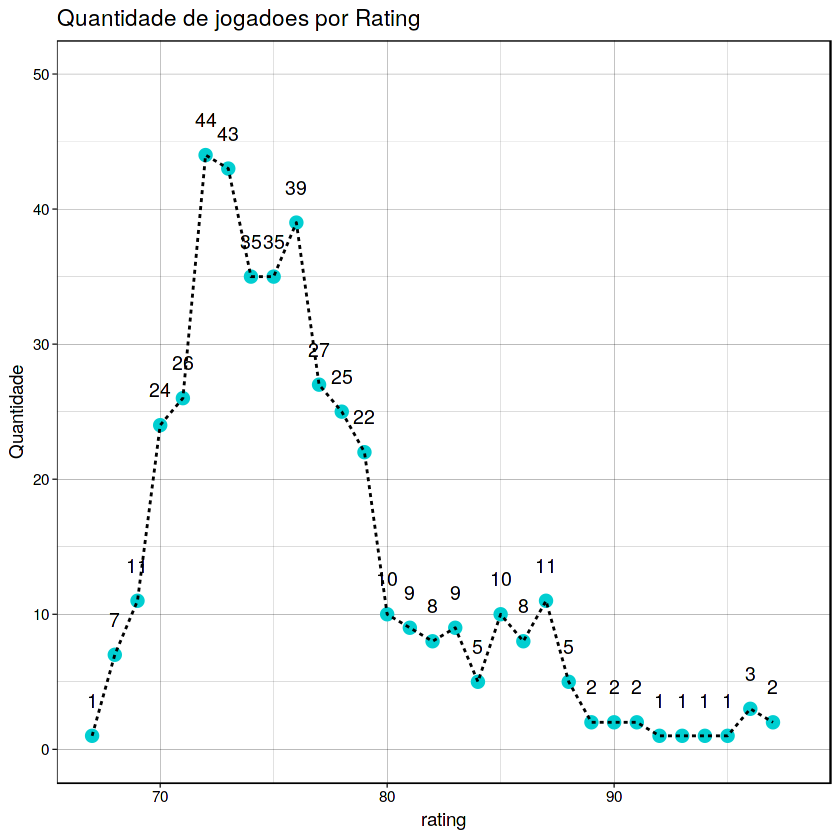

In [139]:

## Quantidade de jogadores com mesmo Rating
base_nba %>% count( rating) %>% arrange(desc(rating)) %>%
    ggplot()+
        geom_point(mapping = aes(x = rating, y = n),size= 3, color="#00CED1")+
            geom_line(mapping = aes(x = rating, y = n), size=0.6, linetype = 2)+
                geom_text(aes(x = rating,y=n, label =n), vjust =-2, size = 4)+
                scale_y_continuous(limits = c(0,50))+
                     scale_x_continuous(limits = c(67,98))+
                ylab(label = "Quantidade")+
                    ggtitle(label = "Quantidade de jogadoes por Rating")+
                        theme_linedraw()

In [140]:
## Para grafico animado transition_reveal(salary) -- mas consome muita memoria
library(gganimate)

In [141]:
jogadores<-base_nba %>% select(full_name, salary) %>% arrange(desc(salary)) %>% head(10)
jogadores<-jogadores %>% mutate(salary_Mi=round(salary/1000000,1))
## Maior Salario

jogadores %>%
    ggplot() + geom_point(mapping = aes(reorder(full_name,salary_Mi),y = salary_Mi), size=4,color = '#1874CD')+
                   geom_line(mapping = aes(x=full_name,y = salary_Mi,group= 1), linetype=2)+
                        geom_text(aes(x = full_name,y=salary_Mi, label =salary_Mi), vjust =-2, size = 4)+
                            scale_y_continuous(limits = c(31,44))+
                                coord_flip()+
                                    xlab(label = "Players")+
                                        ylab(label = "salary in millions")+
                                             ggtitle(label = "10 biggest payouts") +
                                                    theme_bw()+
                                                        transition_reveal(salary_Mi)
                           

<img src="data:image/gif;base64,R0lGODlh4AHgAfUAAAICAgwMDBQUFBsbGyMjIysrKzMzMzw8PERERExMTFNTU1paWmRkZGxs
bHNzc3x8fBhzzVKW2laY2lqb23Kp4Hqu4n2w44SEhIyMjJOTk5ubm6GhoaysrLW1tbu7u4e2
5Yu34aHD5bfU8LrV8MPDw8vLy9PT09vb28ne887h9NHj9dno99/s+OXl5ezs7Ofw+uzz+/T0
9Pf6/f///wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACH5BAQKAAAAIf8L
TkVUU0NBUEUyLjADAQAAACwAAAAA4AHgAQAG/sCZcEgsGo/IpHLJbDqf0Kh0Sq1ar9isdsvt
er/gsHhMLpvP6LR6zW673/C4fE6v2+/4vH7P7/v/gIGCg4SFhlwdBoeLjI2Oj1YaDUMtCQEG
HkWJRSUAJl0DJWmhkKWmp4ElFwKTQgYNLRoBLkSbRC4aMaCiaKSov8DBcJIFrSYBujMGGbUG
DwMDDzMuADIzHgYCCgsY1wYBC9wzJwgBBBpCFwMBCCczBwACHbUIFwYEF0IdBfHdDa3UWswg
8a0AhxnHhiDYgCDePHXs3AmbSLHiFgatOBQY8q8WgAYuPAjQQG1GiwAbWmAAgOHkBhcrMcgY
cCFkgA4eApCotECI/q8hHQLkc1FgQ4wAGVx0AHBCpJAMB6YJSBq0xIkACjfMIJVzZ4KeFsOK
Hbuk44wMioQ8UFArgLUZGBCUvMBWCAEMdIfc5ZB2xoUGQT3IkJFswCciOYdoQCDj8LESMgSQ
eIdOQ1+MV7NuFRV4cDKyoEOHxShEI8dW+jbqI0BNRgMHQxJgeB0bA4YAAgQMENDTMjheP1cD
3bjYgIIAol6fpHUBLFwFCYUs3CzEtwJeorNrR0V6Rglk0rsBBQ9XbrW8QgrgrTtDPd8hLlq0
cNfiAVbqiMnHFXlY8rUBGNSlQVRC/JOZXVqRMp9JDwiw3YMQNmKWMg/IwMEsHoFEwgAv/lVz
FQcuZBAABh+GyJILU7lQggAcZCCACS6o41MmGbpAggAbbDBACzECME9kLApxElU6UZOLiAlm
4iKMq0To5JOBTNgCAgJgUgQJr+nWTUkz7MMKA+h42QADWpVwgDnMxMCAAJfw4kCQQ3hQwDM0
zSDDcXdhQIAua741UEFawaXbAw/M40AAHKjJ5gGTQenoo6e0QOM7Hkiq0DxV7OOEAwxA6umn
25ngYwwbCNDYqKX6OYUtSsRggn+gxiprWBsUMMABvNR6K3ZUyMmESNLMKuywxBZr7LHIJqvs
ssw26+yz0EYr7bTUVmvtHjG4EEO222rLrbfagsttt+N6+y25/udui2644porrrrlptsuuvG6
Wy+59r6rb7zwtjvvuvDeuy+//8p7L74AH2wuwC4M/K668+77cMHhIpyuwQTzCzG+FNPL8Ljx
qiqaAxtokGPJJ5uco8ort+wyyjCzbLLMMZ9csso055xyyzjvrHPNL7MMdMkZuNwzzz7vDLPR
QS/d89Eo4zwz000rTTPVP0dtNdI3O+211l7/DPXVVH+twdRcgz000Fk/HfTZzGwXdx2EBUIL
IJ/5sW0gedOBjtx49M3H3X+IzMfeeOMxd3aLzzGY3XzzLTi2ij/Y+ByT60G43pJHbocMl4MW
ehyZ5yFQ4niXHnjl24n3OeSo/4G4/uysazc6HKrf4YLheuRux+yc33G7WMO74Xsdp9Oeuud0
F2+R82vUDcjmfRxPhwzUH14746tPz3seMXwfuPWYby8a9GuQL0f2e4iPB/bM14H+RPOj8fj0
8fchvfLNW979H+zrHd8CCD7zhaZ+Z9ifH3YXO72pj3QGFN3//JC84BXugbiLIFkQeAYMvoGA
E6yeB42nwbG47nojbAMI75BCNgCveiUk3vtgxz8A5m8OHPxFDsvQwjVUEIZ4W+HvYhiWHY5B
gX34ofaW10A6GHEKGXiAAw7ChA40ygkmkOIDRvhEMfRQDUKswxfT8MIl9s8MJYjbA1pgAioi
wQNXZIIL/hygCw+ELhml62IYxogGJWLLfb8LIx346AU9PuEEDjgMXBxwggs8IAMyuBkGYuCB
CziSMI6EpAfOdoG34GQIJ+iAKDZggkpmwAO2wQAttkgEQ36BkGYQpOMEAUseErELJ8hAA9DR
Rg5MhgMe2MBBOoATdJDSlzPw5SZnQMrqKLJLo2wKM+w4kA7ESAgbGNMFztWwbrHLYBXbmMUk
xk1vlhNjEbuYwr4Frm+Gs2LwLGc838nNdmYrnuek1zzZuc9u3vOf9AynPjMmT5C9s5v0FJg6
/wVPeyJUoeJsWD8V6k+E4hOfA52nK5vQAl3I4AEkaCNeMpCBEjTTBKfMBAdM/jDSksIRmqWZ
FAc4EE0PZMKmM4jBBawohKagMnye8UxOCaOLohImqOGD11GTelSiNpWpUFUXUp3KVKpONarb
eqpTg1q3pBZ1qECFqraWSlaoahWoTwXrV6uKVbO6taxNTatXcwrWq0r1rVaFq1ehmtO7PpWt
evXrUtEaVrXSFbB7japezzoYuRL1sIxV6lvDutEqYkoDHijBTDOxE2Emk5iTESUwByIplfKi
BXQcCAY++YBSTualfmFlK0M4uBtiS5ZyqOUWKrsEGWBAisxA7QkecAFjWrKTL11pDIiLjpd2
QCLeIdQDGkbcDDTltY3qQD6KwNst6HYMuIUgE2vo/rjuWmED0B0DMrk7Q/w18XDhzeDnzFsF
9JahkkegLxa+KwY/ChAQSDSj/B50QsfxNwz+LeB4LThgwLGQhgzWX3zfcOAr6HcQF7ZChb8w
YRIuGIhntB1t99DhNmzYC2WknPD897sTdyHBgQOkGF3MBRpLIcOBwDEVbKyFErNBxnTzcfpu
WREdTwHIdBCyGnichQCrOMTc+xyTsQDjBwfRtnEwsh+0HIUpX0HJZOzce+XAZT6U+QletgKY
0ZDmKjj5v3Y4sx7kzIQ352HNHRQzeXHI4iG6d8+3xTIc6Ezk6NkNyblFdBzsPOIs9xmFENaf
niMsB9A9epCRFnD18GyG/jYvgdArvoOi48BpWwLY01NAdRJAbYcCl+/PlMaWqrtcaPo12nSC
Hl+u3cDqBr8O1iB24K5/3Gsn3hoPVfaz7GYNBWYbodh8lvKhx9y7UpPB2USwtIOVvcBh0w3b
TQD3EKBN5vbakNrgs/YYxP2US1ea3UpQtxcDwWgrx5nAx9bdqCm8b+PBOwnwJrej7d1tAE86
2Mbethgz/WRho/sNAh80C/+NBHnvkd4WB0PA3Z1bhsPZ4YAeuIgJnkRvXy/jrxR1xCFubgqa
3MAvT8PKeS1qih8B5SgeYMzRMPM2uLrjgEj2wj+s6Whb4QQLIFQD0usEK8L2Au7oQLAaoDr7
/j7B6uwVtccVfMGdn0GPuRRCCX6+BDjy9LNwaQBhUGOENmJdCFVneru1Duyitw/nXWC3tq2g
ErFnQJTMNEEjdzr4Duj0Ad1weqNO0I0HkBKlh2dG4THgANs4kpK2idEFtmTJbqx07GKfqUyy
GjCietX0Yd2qZEmfWKSmPmB7NT1VpTpY18ue9pK1/eu9Otasol73qz+9Ugfr1ru2vvas94xg
hQ985N/++KdHfWJZL3zcq3721fd99qmP/bBmq6yxp/7ulQ/96yc/YGBnAKEYoJRobuC1778G
Mn0pyrO7pgUZMIEwPTD/YL62jRpwEByAE8wQfxpAAgaoWRwQLF3i/gAOsE0LA3sSCDIUOIGw
tzD5EoEWGDAY2C8byIEDFYIWA4Li9IEkWIEoaIECpYEJY1AR5YEmSIEdGFEseIIyGIMzGIMl
WIE1CIMeI4H2AoMsCHZxswHENEow8lskABMglQEXQFIloHhD8ADA9FE14YRQyIQkoFknhVmZ
0BLVBIYkwAEbIEV903M2ZwRCh2

In [142]:
### Maiores salarios por times e posição
base_nba %>% select(full_name,team,position, salary) %>% arrange(desc(salary)) %>% head(6) 

full_name,team,position,salary
<chr>,<chr>,<chr>,<dbl>
Stephen Curry,Golden State Warriors,G,40231758
Russell Westbrook,Houston Rockets,G,38506482
Chris Paul,Oklahoma City Thunder,G,38506482
James Harden,Houston Rockets,G,38199000
John Wall,Washington Wizards,G,38199000
LeBron James,Los Angeles Lakers,F,37436858


In [143]:
### Média Salarial por time.

base_nba %>% group_by(team) %>% summarize(average_wage=mean(salary, na.rm = TRUE),num_of_playes=n()) %>% arrange(desc(average_wage)) %>% head(5)

team,average_wage,num_of_playes
<chr>,<dbl>,<int>
Golden State Warriors,14347339,9
Los Angeles Clippers,10774057,14
Portland Trail Blazers,10671061,12
Miami Heat,10438351,12
Houston Rockets,10317469,13


In [144]:
maior_30<-base_nba %>% filter(age >=30) %>% group_by(age) %>% summarize(media=mean(salary,na.rm = TRUE),quantity=n()) %>% arrange(desc(age))
maior_30 <- maior_30 %>% mutate(salary_MI=round(media/1000000,1))

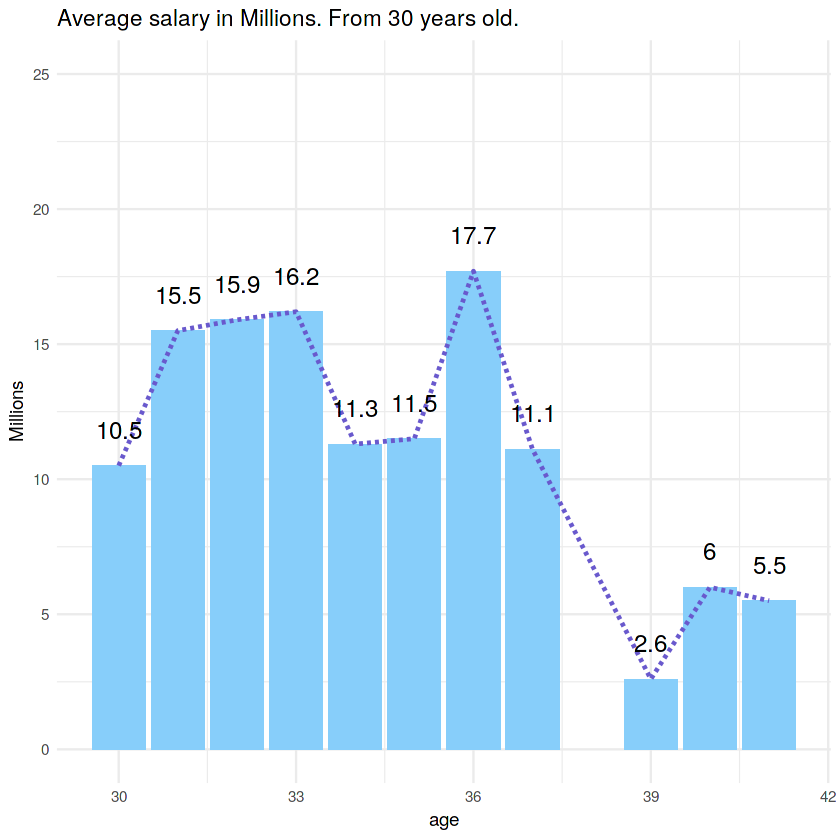

In [145]:
#### Media salarial por idade maior igual a 30
maior_30 %>%
    ggplot()+
        geom_col(mapping = aes(x=age, y= salary_MI), fill="#87CEFA")+
            geom_line(aes(x=age, y= salary_MI),color="#6959CD", linetype=2, size =1)+
                geom_text(aes(x = age, y=salary_MI, label=salary_MI), vjust=-1.5, size=5)+
                    scale_y_continuous(limits = c(0,25))+
                        ggtitle(label = "Average salary in Millions. From 30 years old.")+
                            ylab(label = "Millions")+
                                theme_minimal()

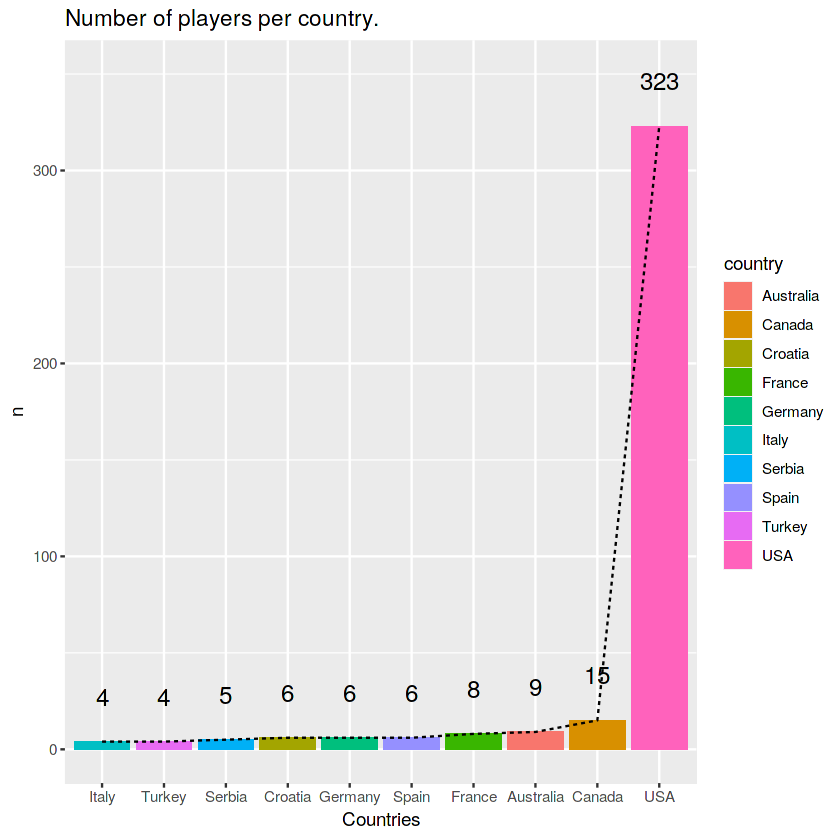

In [146]:
### Quantidade de jogadores por País
base_nba %>% group_by(country) %>% count(country) %>% arrange(desc(n)) %>% head(10) %>%
    ggplot()+
        geom_col(mapping = aes(x = reorder(country,n), y = n, fill = country))+
            geom_text(aes(x = country,y = n, label = n), vjust=-2, size = 5)+
                geom_line(aes(x = reorder(country,n), y = n), group= 1, linetype = 2)+
            scale_y_continuous(limits = c(0,350))+
                ggtitle(label = "Number of players per country.")+
                    xlab(label = "Countries")

## Categorizar Variaveis (fatores)

In [147]:
### Categorizar Variaveis (fatores)
length(levels(as_factor(base_nba$college)))



base_nba$team<-as.numeric(factor(base_nba$team,labels =  c(1:30)))
base_nba$position<-as.numeric(factor(base_nba$position,labels =  c(1:7)))
base_nba$country<-as.numeric(factor(base_nba$country,labels =  c(1:39)))
base_nba$draft_year<-as.numeric(factor(base_nba$draft_year,labels =  c(1:18)))
base_nba$draft_round<-as.numeric(factor(base_nba$draft_round,labels =  c(1:3)))
base_nba$draft_peak<-as.numeric(factor(base_nba$draft_peak,labels =  c(1:57)))
base_nba$college<-as.numeric(factor(base_nba$college,labels =  c(1:109)))

base_nba$college<-as.numeric(base_nba$college) ## transformando em numerico


[1] 109

## Preenchendo NAs

In [148]:
indice<-base_nba %>% filter(is.na(college))
base_nba$college[indice$indice]<-0

## Substituir todas NAs por 0(zero)

In [149]:
valores_nulos<-c()
for(i in 1: length(base_nba)){
    
        valores_nulos[i]<-sum(is.na(base_nba[i])) 
  
    
}
valores_nulos

[1]  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0

In [150]:
head(base_nba,3)

indice,full_name,rating,jersey,team,position,b_day,age,height_meters,weight_KG,country,draft_year,draft_round,draft_peak,college,salary
<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LeBron James,97,#23,14,3,1984-12-30,36,2.06,113.4,39,2,2,2,0,37436858
2,Kawhi Leonard,97,#2,13,3,1991-06-29,30,2.01,102.1,39,10,2,16,74,32742000
3,Giannis Antetokounmpo,96,#34,17,5,1994-12-06,27,2.10,109.8,17,12,2,16,0,25842697


In [151]:
team_indice<-base_nba %>% filter(is.na(team))
base_nba$team[team_indice$indice]<-0

# selecionar apenas Variaveis que iremos dividir

In [152]:
base_nba<-base_nba %>% select(rating,team,position,age,height_meters,weight_KG,country,draft_year,draft_round,draft_peak,college,salary)
head(base_nba,3)

rating,team,position,age,height_meters,weight_KG,country,draft_year,draft_round,draft_peak,college,salary
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
97,14,3,36,2.06,113.4,39,2,2,2,0,37436858
97,13,3,30,2.01,102.1,39,10,2,16,74,32742000
96,17,5,27,2.10,109.8,17,12,2,16,0,25842697


## EScalonamento

In [153]:
base_nba[,c(1:11)]<-scale(base_nba[,c(1:11)])

In [154]:
head(base_nba,3)

rating,team,position,age,height_meters,weight_KG,country,draft_year,draft_round,draft_peak,college,salary
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.645804,-0.09059628,-0.6939916,2.0015038,0.9148069,1.568429,0.4925167,-2.8291476,-0.1411158,-1.0776442,-1.3350142,37436858
3.645804,-0.20132506,-0.6939916,0.5403947,0.2818196,0.470626,0.4925167,-0.7897368,-0.1411158,-0.1980124,0.8660432,32742000
3.469055,0.24159007,0.4025918,-0.1901599,1.4211968,1.218686,-1.5110921,-0.2798842,-0.1411158,-0.1980124,-1.3350142,25842697


## Dividindo em base Treinamento e base teste.

In [155]:
library(caTools)

In [156]:
set.seed(10)
dividir<-sample.split(Y = base_nba$salary,SplitRatio = 0.70)
base_treinamento<-subset(x = base_nba,subset = dividir == TRUE)
base_teste<-subset(x = base_nba,subset = dividir == FALSE)

## Criando modelo de regressão. Regressão multipla  

In [157]:
regreMult<-lm(formula =salary ~.,data = base_treinamento )
summary(regreMult)


Call:
lm(formula = salary ~ ., data = base_treinamento)

Residuals:
      Min        1Q    Median        3Q       Max 
-17297877  -3310929    217501   2947353  18021904 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8658657     309334  27.991  < 2e-16 ***
rating         6323628     361944  17.471  < 2e-16 ***
team            127329     313147   0.407  0.68460    
position        517721     480181   1.078  0.28186    
age            2543764     820792   3.099  0.00213 ** 
height_meters   432648     496254   0.872  0.38403    
weight_KG       101191     433855   0.233  0.81574    
country         101774     311227   0.327  0.74390    
draft_year     -351326     824301  -0.426  0.67027    
draft_round     506743     698588   0.725  0.46881    
draft_peak     -293184     708465  -0.414  0.67931    
college          90307     323828   0.279  0.78054    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 533100

## Criando modelo de regressão. Random Forest

In [158]:
library(randomForest)

In [159]:
modelo_RF<- randomForest(formula = salary ~.,data = base_treinamento,ntree = 150)
summary(modelo_RF)

                Length Class  Mode     
call              4    -none- call     
type              1    -none- character
predicted       300    -none- numeric  
mse             150    -none- numeric  
rsq             150    -none- numeric  
oob.times       300    -none- numeric  
importance       11    -none- numeric  
importanceSD      0    -none- NULL     
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y               300    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     

## Previsao

In [160]:
set.seed(10)
previsao_teste<-predict(regreMult,newdata = base_teste[,-12])

previsao_trei<-predict(regreMult,newdata = base_treinamento[,-12])


## Previsao RF

In [162]:
set.seed(10)
previsao_RF <- predict(modelo_RF,newdata = base_teste[-12])
previsao_RF_trein<-predict(modelo_RF,newdata = base_treinamento[,-12])

## Mean Absolute Error

In [163]:
mean(abs(base_teste$salary - previsao_teste)) ## Regressão Multipla
mean(abs(base_treinamento$salary - previsao_trei)) ## Regressão Multipla
mean(abs(base_teste$salary - previsao_RF)) ## Random Forest
mean(abs(base_treinamento$salary - previsao_RF_trein)) ## Random Forest

[1] 4457375

[1] 3997358

[1] 3492343

[1] 1615922

## Avaliação do Algoritimo

### Regressão Multipla - 41.13% teste 
### treinamento - 71.00 % 
                     
                    

In [164]:
library(miscTools)

rSquared(base_teste$salary,base_teste$salary - previsao_teste)
rSquared(base_treinamento$salary,base_treinamento$salary - previsao_trei)

0.4097033


0.7104383


### Random Forest  - 56.70 % teste
### 94.5 % treinamneto
                              

In [165]:
rSquared(base_teste$salary,resid = base_teste$salary - previsao_RF)
rSquared(base_treinamento$salary,resid = base_treinamento$salary - previsao_RF_trein)

0.5723096


0.9418491


# Regressão Multipla

## Base Treinamento-Rating X Salary , Rating X Previsao_trein 
## Rating X Previsao_teste

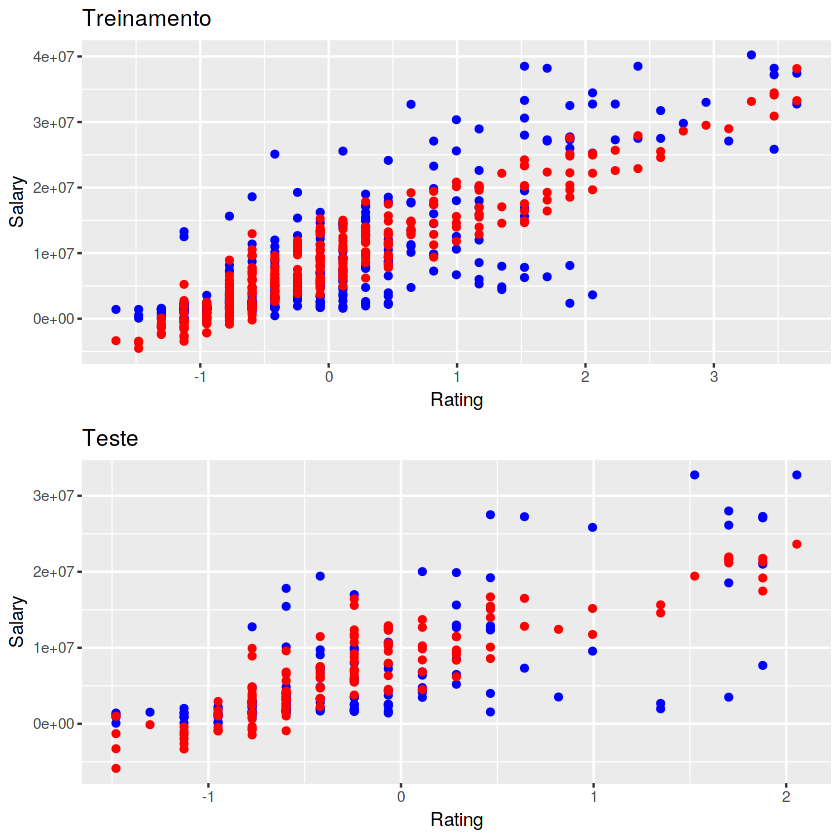

In [166]:

treinamento<-ggplot() + geom_point(mapping = aes(x = base_treinamento$rating,y = base_treinamento$salary), color = "blue")+
                geom_point(mapping = aes(x = base_treinamento$rating,y = previsao_trei), color = "red")+
                    ylab(label = "Salary")+
                    xlab(label = "Rating")+
                    ggtitle(label = "Treinamento")

teste<-ggplot() + geom_point(mapping = aes(x = base_teste$rating,y = base_teste$salary), color = "blue")+
                geom_point(mapping = aes(x = base_teste$rating,y = previsao_teste), color = "red")+
                    ylab(label = "Salary")+
                    xlab(label = "Rating")+
                    ggtitle(label = "Teste")
library(gridExtra)
grid.arrange(treinamento,teste)

## Base Teste,Rating X Salary 
## Rating X previsao_RF_trein

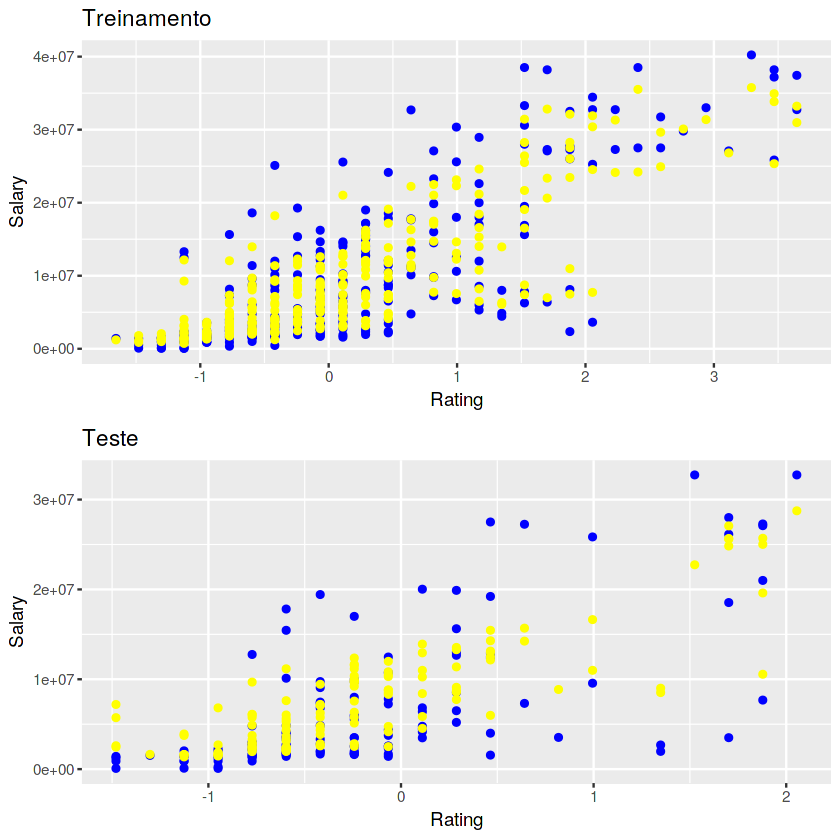

In [167]:
treinamento_RF<-ggplot() + geom_point(mapping = aes(x = base_treinamento$rating,y = base_treinamento$salary), color = "blue")+
                geom_point(mapping = aes(x = base_treinamento$rating,y = previsao_RF_trein), color = "yellow")+
                    ylab(label = "Salary")+
                    xlab(label = "Rating")+
                    ggtitle(label = "Treinamento")

teste_RF<-ggplot() + geom_point(mapping = aes(x = base_teste$rating,y = base_teste$salary), color = "blue")+
                geom_point(mapping = aes(x = base_teste$rating,y = previsao_RF), color = "yellow")+
                    ylab(label = "Salary")+
                    xlab(label = "Rating")+
                    ggtitle(label = "Teste")

grid.arrange(treinamento_RF,teste_RF)